What we need:
Pages
Prices
ratings
titles
images (url)

In [123]:
#create empty lists

pages = []
ratings = []
prices = []
title = []
urls = []

In [11]:
import requests
import bs4

In [6]:
no_of_pages = 5 #uzimamo samo brvih 5 strana

In [124]:
for i in range(1,no_of_pages+1):
    url = ('http://books.toscrape.com/catalogue/category/books_{}/index.html'.format(i))
    pages.append(url)

In [113]:
pages

['http://books.toscrape.com/catalogue/category/books_1/index.html',
 'http://books.toscrape.com/catalogue/category/books_2/index.html',
 'http://books.toscrape.com/catalogue/category/books_3/index.html',
 'http://books.toscrape.com/catalogue/category/books_4/index.html',
 'http://books.toscrape.com/catalogue/category/books_5/index.html']

In [125]:
for item in pages:
    page = requests.get(item)
    soup = bs4.BeautifulSoup(page.text,'html.parser')
    #print(soup.prettify())
    for t in soup.findAll('h3'): #svi naslovi su u h3 tagovima
        titles_temp = t.getText()
        title.append(titles_temp)
    for p in soup.find_all('p', class_ = 'price_color'): #sve cene u p, sa klasom price_color
        price_temp = p.getText()
        prices.append(price_temp)
    for r in soup.find_all('p', class_ = 'star-rating'):
        for k,v in r.attrs.items():
            #k predstav;ja rec, v predstavlja ostatak (star-rating i broj kao dva clana niza
            #zato uzimamo v[1]
            star = v[1]
            ratings.append(star)
    divs = soup.find_all('div', class_ = 'image_container')
    for pics in divs:
        pics_temp = pics.find('img', class_ = 'thumbnail')
        link_temp = 'http://books.toscrape.com' + str(pics_temp['src'])
        final_link = link_temp.replace('..','')
        urls.append(final_link)


Proverio sam sve liste, nisam ostavio da ne bih pravio shum. Popunjene su sve, sada od njih pravim dataframe


In [117]:
import pandas as pd

In [118]:
web_data = {'Title':title,'Price':prices,'Rating':ratings,'URL':urls} #mora biti istibroj clanova

In [127]:
df = pd.DataFrame(web_data)

In [128]:
df

,Title,Price,Rating,URL
0,A Light in the ...,Â£51.77,Three,http://books.toscrape.com///media/cache/2c/da/...
1,Tipping the Velvet,Â£53.74,One,http://books.toscrape.com///media/cache/26/0c/...
2,Soumission,Â£50.10,One,http://books.toscrape.com///media/cache/3e/ef/...
3,Sharp Objects,Â£47.82,Four,http://books.toscrape.com///media/cache/32/51/...
4,Sapiens: A Brief History ...,Â£54.23,Five,http://books.toscrape.com///media/cache/be/a5/...
...,...,...,...,...
95,Our Band Could Be ...,Â£57.25,Three,http://books.toscrape.com///media/cache/54/60/...
96,Olio,Â£23.88,One,http://books.toscrape.com///media/cache/55/33/...
97,Mesaerion: The Best Science ...,Â£37.59,One,http://books.toscrape.com///media/cache/09/a3/...
98,Libertarianism for Beginners,Â£51.33,Two,http://books.toscrape.com///media/cache/0b/bc/...


In [129]:
#hocu da indeksi pocinju od 1 a ne od 0
df.index+=1

In [ ]:
#remove currency from price


In [135]:
df.columns

Index(['Title', 'Price', 'Rating', 'URL'], dtype='object')

In [133]:
df['Price']=df['Price'].str.replace('Â£','')

In [136]:
df['Price']

1      51.77
2      53.74
3      50.10
4      47.82
5      54.23
       ...  
96     57.25
97     23.88
98     37.59
99     51.33
100    45.17
Name: Price, Length: 100, dtype: object

In [148]:
#sortiramo po cenama
df.sort_values(by="Price", ascending = False, inplace = True)

In [149]:
df['Rating']= df['Rating'].replace({'Five':5,'Four':4,'Three':3,'Two':2,'One':1}) #Prebacujem rejting u intove

In [150]:
df['Title'].unique()

array(['Our Band Could Be ...', 'Sapiens: A Brief History ...',
       'Tipping the Velvet', "Scott Pilgrim's Precious Little ...",
       'The Black Maria', 'A Light in the ...',
       'Libertarianism for Beginners', 'Soumission', 'Sharp Objects',
       "It's Only the Himalayas", 'Mesaerion: The Best Science ...',
       'Rip it Up and ...', 'The Dirty Little Secrets ...', 'Olio',
       'The Requiem Red', 'The Boys in the ...', "Shakespeare's Sonnets",
       'The Coming Woman: A ...', 'Set Me Free',
       'Starving Hearts (Triangular Trade ...'], dtype=object)

In [151]:
df.drop_duplicates('Title',keep = 'first', inplace=True) #skidam duple naslove

In [147]:
df

,Title,Price,Rating,URL
1,A Light in the ...,51.77,3,http://books.toscrape.com///media/cache/2c/da/...
2,Tipping the Velvet,53.74,1,http://books.toscrape.com///media/cache/26/0c/...
3,Soumission,50.10,1,http://books.toscrape.com///media/cache/3e/ef/...
4,Sharp Objects,47.82,4,http://books.toscrape.com///media/cache/32/51/...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com///media/cache/be/a5/...
6,The Requiem Red,22.65,1,http://books.toscrape.com///media/cache/68/33/...
7,The Dirty Little Secrets ...,33.34,4,http://books.toscrape.com///media/cache/92/27/...
8,The Coming Woman: A ...,17.93,3,http://books.toscrape.com///media/cache/3d/54/...
9,The Boys in the ...,22.60,4,http://books.toscrape.com///media/cache/66/88/...
10,The Black Maria,52.15,1,http://books.toscrape.com///media/cache/58/46/...


In [154]:
df.dtypes

Title      object
Price     float64
Rating      int64
URL        object
dtype: object

In [156]:
#treba prebaciti cene u float
df['Price'] = df['Price'].astype(float)

## Kratki uvod u analizu

Da li postoji neka korelacija izmedju cena i rejtinga?

In [157]:
df.corr()

,Price,Rating
Price,1.000000,-0.075857
Rating,-0.075857,1.000000


 ovo znaci da rejtinzi opadaju sa rastom cene

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

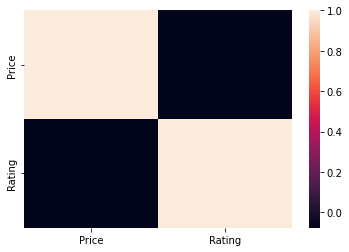

In [162]:
sns.heatmap(df.corr())